In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib
from matplotlib import pyplot as plt

In [3]:
phishing_df = pd.read_csv('dataset\legit_domains.csv')
legitimate_df = pd.read_csv('dataset\phishing_domains.csv')

C:\Users\harsh\AppData\Local\Temp\ipykernel_71388\949181317.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  legitimate_df = pd.read_csv('dataset\phishing_domains.csv')


In [4]:
legitimate_df.shape

(26351, 71)

In [5]:
legitimate_df['Label'].unique()

array([1], dtype=int64)

In [6]:
phishing_df.shape

(26303, 71)

In [7]:
phishing_df['Label'].unique()

array([0], dtype=int64)

In [8]:
data = pd.concat([legitimate_df, phishing_df])
#data = data.drop('url',axis=1)
data = data.drop(['url','NonStdPort','GoogleIndex','double_slash_redirecting','https_token'],axis=1)

In [9]:
# data = data.loc['number_of_special_characters','_has_ssl','number_of_name_servers','number_of_href_links',has_pop_up	has_input	has_password	domain_age	number_of_subdomains	has_favicon	NonStdPort	LinksInScriptTags	has_title	has_submit	has_button	has_link	has_email_input	has_hidden_element	has_audio	has_video	number_of_inputs	number_of_images	number_of_option	number_of_list	number_of_TR	number_of_TH	number_of_paragraph	number_of_script	length_of_title	has_h1	has_h2	has_h3	length_of_text	number_of_clickable_button	number_of_a	number_of_div	number_of_figure	has_footer	has_form	has_text_area	has_iframe	has_text_input	number_of_meta	has_nav	has_object	has_picture	number_of_sources	number_of_span','number_of_table','number_link','has_abnormalURL','has_dns_recording','GoogleIndex','double_slash_redirecting','domain_registration_length','statistical_report','submitting_to_email','https_token','count_redirects','has_executable_files','count_javascript_files','number_of_emails','get_ssl_update_age','get_ip_count','get_ssl_expiry_duration','number_of_smtp_servers','number_of_txt_records'
# ]

In [10]:
data['Label'].unique()

array([1, 0], dtype=int64)

In [11]:
non_numeric_cols = data.select_dtypes(exclude=['number']).columns.tolist()
data[non_numeric_cols] = data[non_numeric_cols].apply(pd.to_numeric, errors='coerce')
data.dropna(inplace=True)

In [12]:
X = data.drop('Label', axis=1)
y = data['Label']
X.sample(frac=1)
X.shape

(52652, 65)

In [13]:
X.shape

(52652, 65)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [16]:
print('X_train:',np.shape(X_train))
print('y_train:',np.shape(y_train))
print('X_test:',np.shape(X_test))
print('y_test:',np.shape(y_test))

X_train: (39489, 65)
y_train: (39489,)
X_test: (13163, 65)
y_test: (13163,)


In [17]:
input_shape = [X_train.shape[1]]

In [18]:
np.reshape

<function reshape at 0x000001CF4AC2F0F0>

In [19]:
def ANN():
    #structure
    model = keras.Sequential([
        layers.BatchNormalization(input_shape=input_shape),
        layers.Dense(130, activation='sigmoid'),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        layers.Dense(128, activation='relu'), 
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        layers.Dense(1, activation='sigmoid'),
    ])
    
    #compile
    model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['binary_accuracy'])
    
    #summary
    model.summary()
    #train
    model.fit(X_train,y_train,epochs=100)
    return model

In [20]:
# def ANN2():
#     model = tf.keras.Sequential([
#     #normalizer,
#     tf.keras.layers.Normalization(
#     axis=-1, mean=None, variance=None, invert=False),
#     tf.keras.layers.Dense(128, activation='sigmoid'),
#     tf.keras.layers.Dense(64, activation='sigmoid'),
#     tf.keras.layers.Dense(32, activation='sigmoid'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
#     ])

#     model.compile(optimizer='adam',
#                 loss=tf.keras.losses.BinaryCrossentropy(),
#                 metrics=['accuracy'])
#     model.summary()
#     model.fit(X_train,y_train,epochs=100)
#     return model


    

In [28]:
model = ANN()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_8 (Batc  (None, 65)               260       
 hNormalization)                                                 
                                                                 
 dense_8 (Dense)             (None, 130)               8580      
                                                                 
 batch_normalization_9 (Batc  (None, 130)              520       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 130)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               33536     
                                                                 
 batch_normalization_10 (Bat  (None, 256)             

In [55]:
loss_and_metrics = model.evaluate(X_test, y_test)
print(loss_and_metrics)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

412/412 [==============================] - 1s 3ms/step - loss: 0.3312 - binary_accuracy: 0.8538
[0.3311651945114136, 0.8538327217102051]
Loss =  0.3311651945114136
Accuracy =  0.8538327217102051


In [56]:
predicted = model.predict(X_test)

412/412 [==============================] - 1s 2ms/step


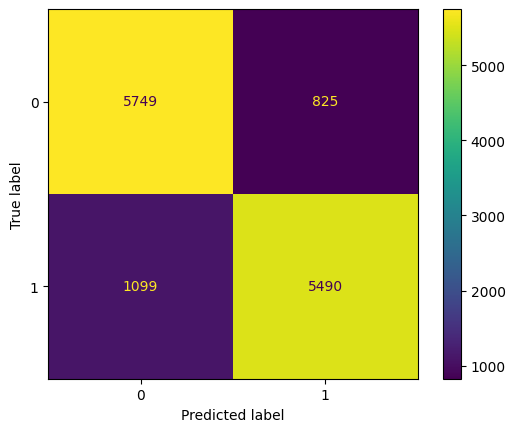

In [57]:
predicted = tf.squeeze(predicted)
predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
actual = np.array(y_test)
conf_mat = confusion_matrix(actual, predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

In [48]:
def plot_metrics(train_metric, val_metric, metric_type):
  # Visualize metrics vs training Epochs
    plt.figure()
    plt.plot(range(len(train_metric)), train_metric, label = f"Training {metric_type}")
    plt.plot(range(len(val_metric)), val_metric, label = f"Validation {metric_type}")
    plt.xlabel("Epochs")
    plt.ylabel(metric_type)
    plt.legend()
    plt.title(f"{metric_type} vs Training epochs");

In [65]:
best_model = None
best_score = 0

In [66]:
for model_name, model in models.items():
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    mean_score = scores.mean()

    if mean_score > best_score:
        best_score = mean_score
        best_model = model_name

print(f"Best Model: {best_model} with Accuracy: {best_score}")

C:\Users\harsh\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\harsh\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Best Model: Random Forest with Accuracy: 0.8851747659850719


C:\Users\harsh\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
